# Plot results

This notebook plots some summarizations of the `results.txt` file generated by the other notebook in this folder.

In [2]:
from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline

font = {'family' : 'DejaVu Sans',
        'size'   : 20}
matplotlib.rc('font', **font)

In [85]:
df1 = pd.read_csv('results_hospmort.csv', na_values=['-'])
df2 = pd.read_csv('results_othermort.csv', na_values=['-'])
df = pd.concat([df1, df2])

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'DejaVu Sans'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


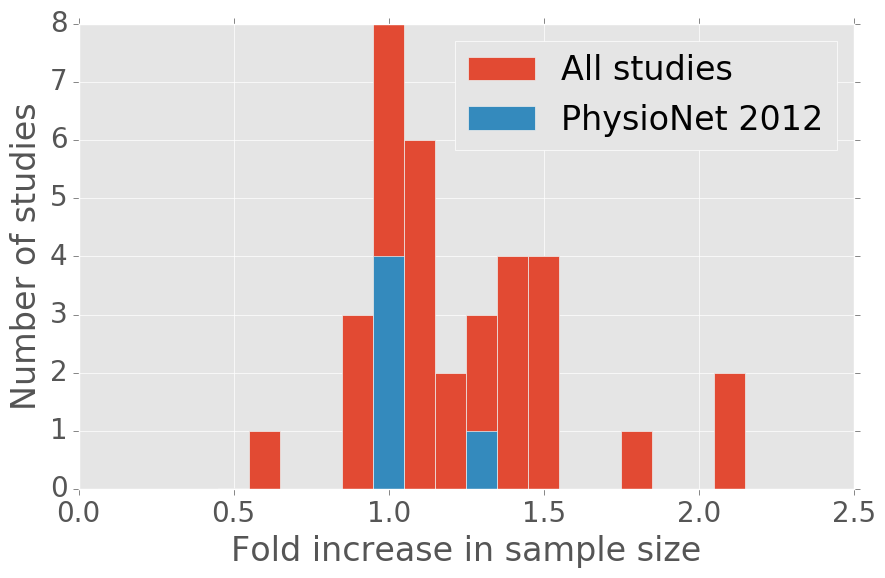

In [6]:
# plot bar chart
xi = np.arange(0.5, 2.6, 0.1)

# exclude studies which had a fixed sample size
studies_ignore = ['caballero2015dynamically']

idxIgnore = np.in1d(df['Cohort'], studies_ignore)

plt.figure(figsize=[10,6])
plt.hist(df.loc[~idxIgnore,'N_Repro']/df.loc[~idxIgnore,'N_Study'], bins=xi,
         align='left',label='All studies')

# overlay the physionet 2012 datasets
studies_pn2012 = ['che2016recurrent',
                  'ding2016mortality',
                  'johnson2012patient',
                  'johnson2014data']
idxShow = np.in1d(df['Cohort'], studies_pn2012)

plt.hist(df.loc[idxShow,'N_Repro']/df.loc[idxShow,'N_Study'], bins=xi,
         align='left',label='PhysioNet 2012')

plt.ylabel('Number of studies')
plt.xlabel('Fold increase in sample size')

plt.legend(loc='upper right')

plt.show()

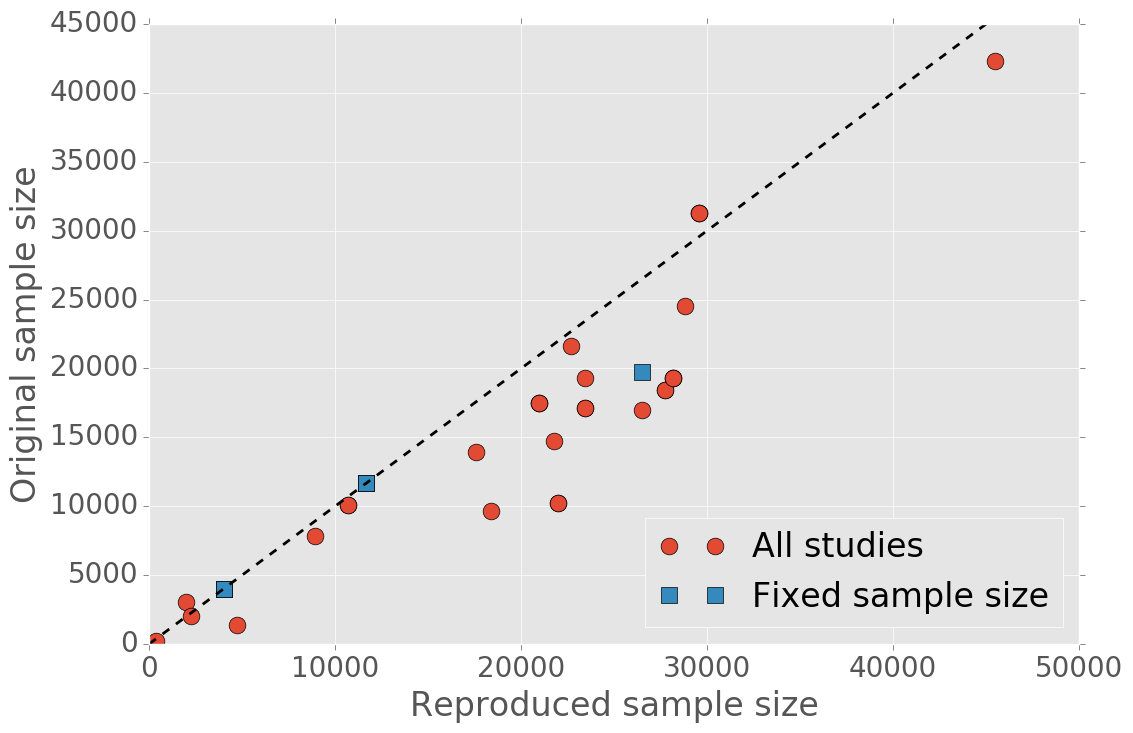

In [7]:


# exclude studies which had a fixed sample size
# add physionet2012 studies to this
studies_ignore = ['caballero2015dynamically',
                  'che2016recurrent','ding2016mortality',
                  'johnson2012patient', 'johnson2014data']
idxIgnore = np.in1d(df['Cohort'], studies_ignore)


# scatter plot
xi = np.arange(0.5, 2.6, 0.1)
plt.figure(figsize=[12,8])
plt.plot(df.loc[~idxIgnore,'N_Repro'],df.loc[~idxIgnore,'N_Study'], marker='o', markersize=12, linestyle='none',
         label='All studies')

# overlay the fixed sample size datasets
plt.plot(df.loc[idxIgnore,'N_Repro'],df.loc[idxIgnore,'N_Study'],
         marker='s', markersize=12, linestyle='none',
         label='Fixed sample size')

plt.plot([0, 45000], [0, 45000], 'k--', linewidth=2)
plt.xlabel('Reproduced sample size')
plt.ylabel('Original sample size')

plt.legend(loc='lower right')

plt.show()

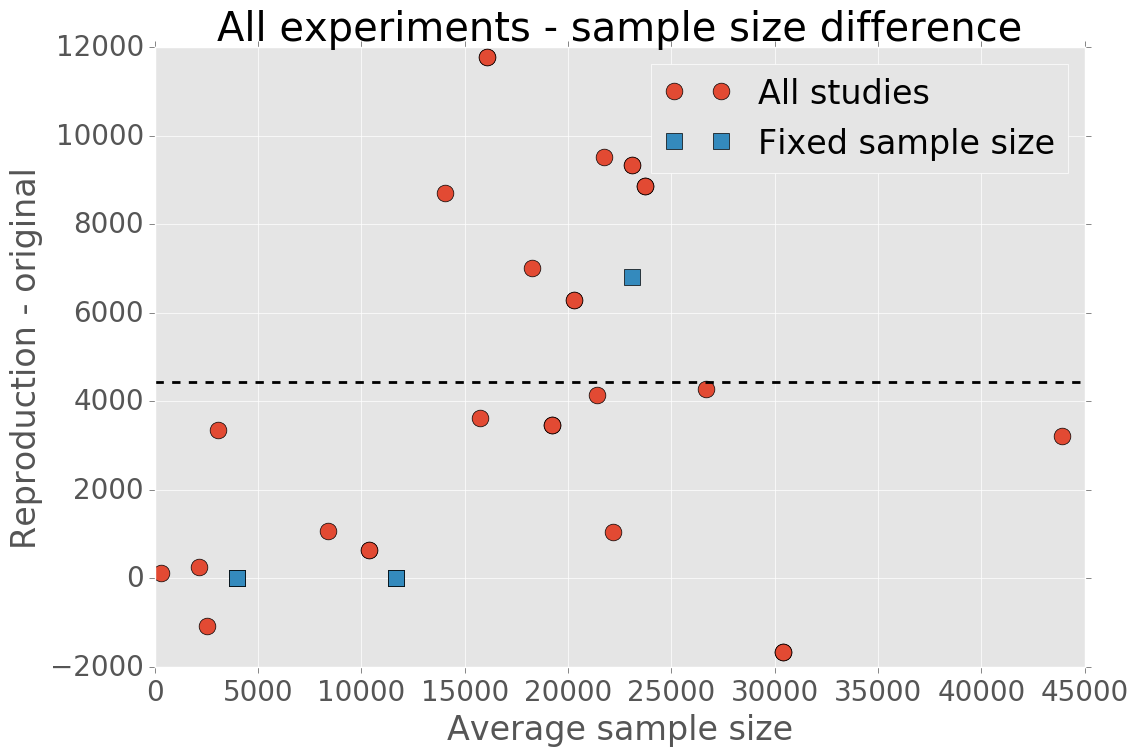

Isolating to studies with non-fixed sample size...
26/30 (86.67%) had abs(repro-study) > 1000.


In [112]:
# bland-altman


# exclude studies which had a fixed sample size
# add physionet2012 studies to this
studies_ignore = ['caballero2015dynamically',
                  'che2016recurrent','ding2016mortality',
                  'johnson2012patient', 'johnson2014data']
idxIgnore = np.in1d(df['Cohort'], studies_ignore)


xi = np.arange(0.5, 2.6, 0.1)
plt.figure(figsize=[12,8])
plt.plot((df.loc[~idxIgnore,'N_Repro']+df.loc[~idxIgnore,'N_Study'])/2.0,
         df.loc[~idxIgnore,'N_Repro']-df.loc[~idxIgnore,'N_Study'],
         marker='o', markersize=12, linestyle='none',
         label='All studies')

# overlay the physionet 2012 datasets
plt.plot((df.loc[idxIgnore,'N_Repro']+df.loc[idxIgnore,'N_Study'])/2.0,
         df.loc[idxIgnore,'N_Repro']-df.loc[idxIgnore,'N_Study'],
         marker='s', markersize=12, linestyle='none',
         label='Fixed sample size')

# plot average bias
plt.plot([0, 45000],
         np.ones(2)*np.mean(df.loc[~idxIgnore,'N_Repro']-df.loc[~idxIgnore,'N_Study']),
         'k--', linewidth=2)

plt.title('All experiments - sample size difference'.format(np.sum(~idxIgnore)))
plt.xlabel('Average sample size')
plt.ylabel('Reproduction - original')

plt.legend(loc='upper right')

plt.show()


print('Isolating to studies with non-fixed sample size...')
N = np.abs(df.loc[~idxIgnore,'N_Repro'] - df.loc[~idxIgnore,'N_Study'])
print('{}/{} ({:2.2f}%) had abs(repro-study) > 1000.'.format(
        np.sum( N > 1000 ), N.shape[0], 100.0*np.mean( N > 1000 )
    ))

## stats on the variation in study size

In [60]:
df.head()

,Cohort,StudyDetail,N_Study,N_Repro,Y_Study,Y_Repro,Model,Study,GB,LR,Notes,pages,split,open_code
0,caballero2015dynamically,$W$=24,11648,11648,NaN,13.01,NonLin,0.8657,0.9060,0.88616,KF,10,80/20,0
1,caballero2015dynamically,$W$=48,11648,11648,NaN,13.01,NonLin,0.7985,0.9227,0.90340,KF,10,80/20,0
2,caballero2015dynamically,$W$=72,11648,11648,NaN,13.01,NonLin,0.7385,0.9314,0.91440,KF,10,80/20,0
3,calvert2016computational,NaN,3054,1985,12.84,13.80,NonLin,0.9340,0.9565,0.90250,Kernel,6,4-fold CV,0
4,calvert2016using,NaN,9683,18396,10.68,14.71,NonLin,0.8800,0.9333,0.91100,Kernel,6,4-fold CV,0


In [62]:
import tableone

t1 = tableone.TableOne(df, continuous=['N_Study','N_Repro','Y_Study','Y_Repro',
                                       'Study','GB','LR'])

/usr/local/lib/python2.7/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


## only unique experiments

In [110]:
plt.boxplot?

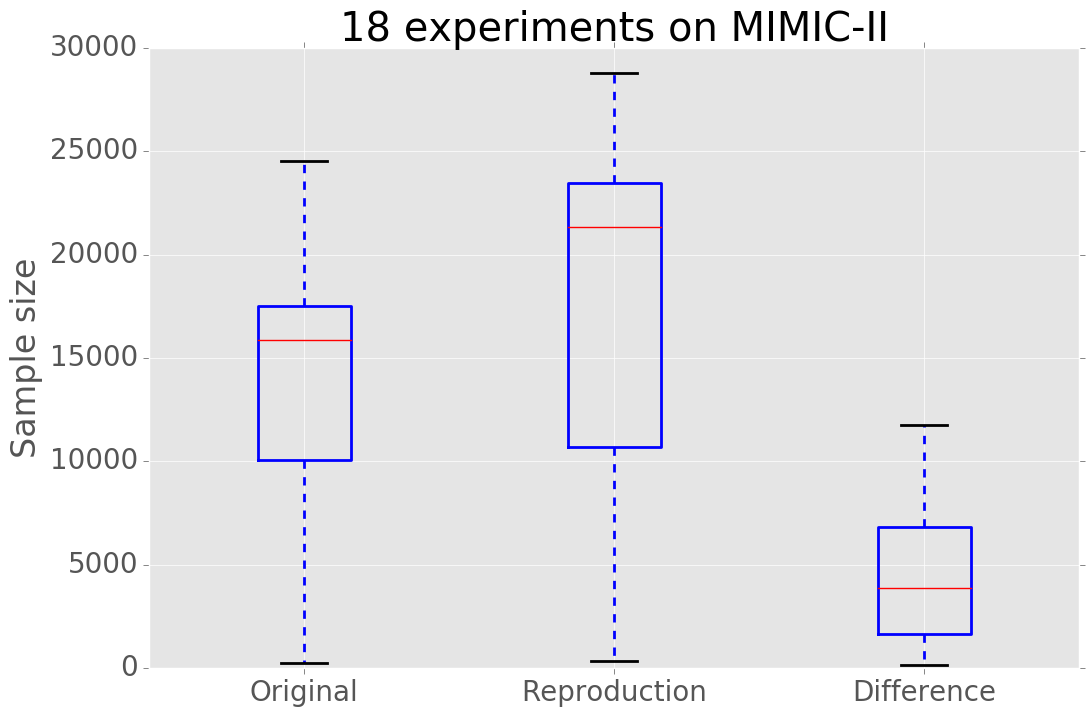

In [113]:
plt.figure(figsize=[12,8])

df['N_Diff'] = df['N_Repro'] - df['N_Study']
cols = ['N_Study','N_Repro','N_Diff']

studies_ignore = ['caballero2015dynamically',
                  'che2016recurrent','ding2016mortality',
                  'johnson2012patient', 'johnson2014data']
idxIgnore = np.in1d(df['Cohort'], studies_ignore)
# only use mimic 2 studies so sample size is comparable
idxIgnore = idxIgnore | (df['mimic']==3)

df_uniq = df.loc[~idxIgnore, ['Cohort'] + cols].drop_duplicates()

cols_dict = {'N_Study': 'Original', 'N_Repro': 'Reproduction', 'N_Diff': 'Difference'}
plt.boxplot(df_uniq[cols].values, labels=[cols_dict[x] for x in cols],
            notch=False, sym='o',
            boxprops={'linewidth':2},
           whiskerprops={'linewidth':2},
           flierprops={'linewidth':2},
           capprops={'linewidth':2})

plt.ylabel('Sample size')
plt.title('{} experiments on MIMIC-II'.format(df_uniq.shape[0]))
plt.show()

In [105]:
df_uniq

,Cohort,N_Study,N_Repro,N_Diff
0,caballero2015dynamically,11648,11648,0
3,calvert2016computational,3054,1985,-1069
4,calvert2016using,9683,18396,8713
5,celi2012database,1400,4741,3341
6,celi2012database,223,350,127
7,che2016recurrent,4000,4000,0
8,ding2016mortality,4000,4000,0
9,ghassemi2014unfolding,19308,28172,8864
10,ghassemi2014unfolding,19308,23442,4134
11,ghassemi2015multivariate,10202,21969,11767


# Outcome

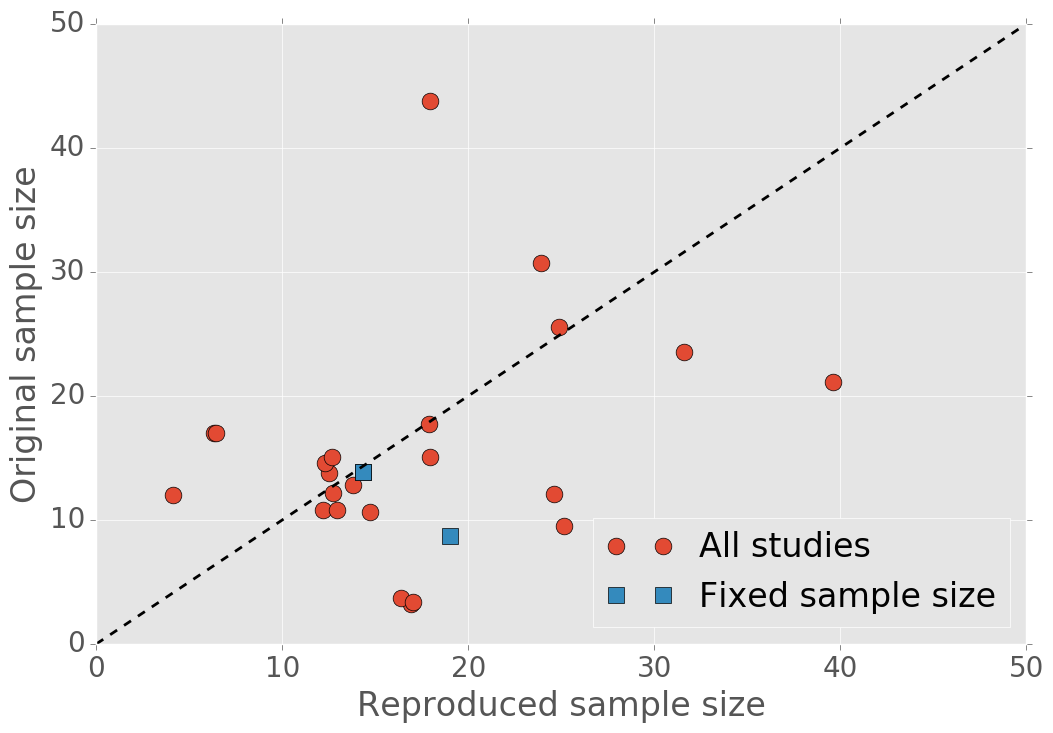

In [9]:
# exclude studies which had a fixed sample size
# add physionet2012 studies to this
studies_ignore = ['caballero2015dynamically',
                  'che2016recurrent','ding2016mortality',
                  'johnson2012patient', 'johnson2014data']
idxIgnore = np.in1d(df['Cohort'], studies_ignore)


# scatter plot
xi = np.arange(0.5, 2.6, 0.1)
plt.figure(figsize=[12,8])
plt.plot(df.loc[~idxIgnore,'Y_Repro'],df.loc[~idxIgnore,'Y_Study'], marker='o', markersize=12, linestyle='none',
         label='All studies')

# overlay the fixed sample size datasets
plt.plot(df.loc[idxIgnore,'Y_Repro'],df.loc[idxIgnore,'Y_Study'],
         marker='s', markersize=12, linestyle='none',
         label='Fixed sample size')

plt.plot([0, 50], [0, 50], 'k--', linewidth=2)
plt.xlabel('Reproduced sample size')
plt.ylabel('Original sample size')

plt.legend(loc='lower right')

plt.show()

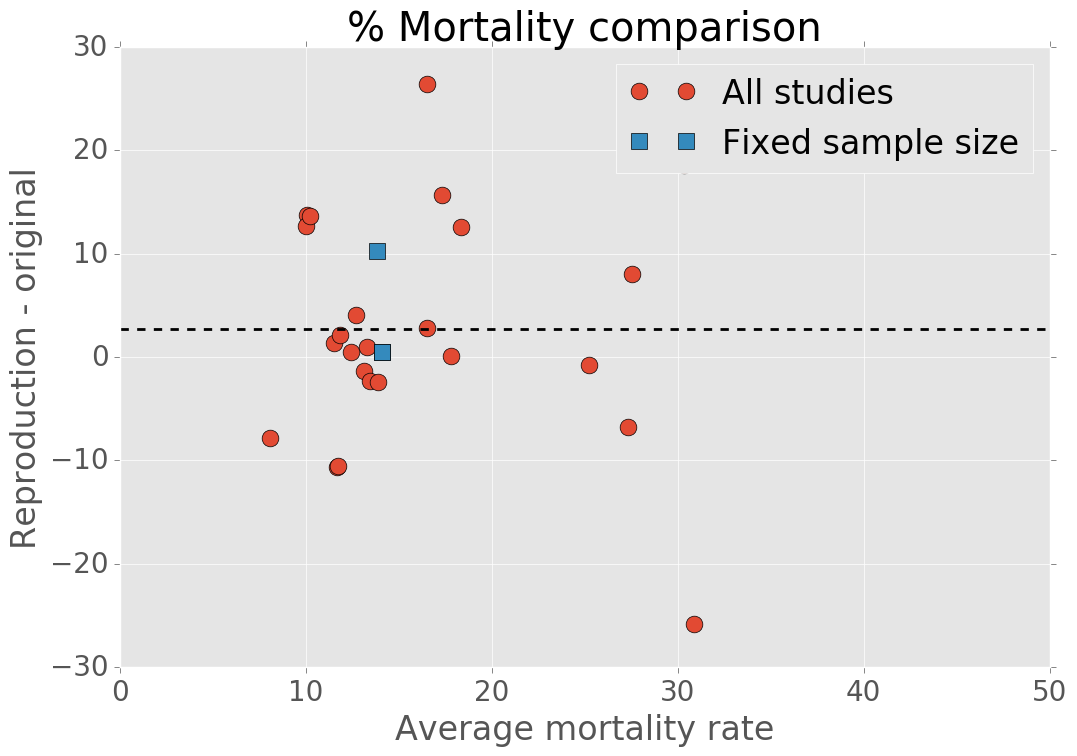

In [16]:
# bland-altman


# exclude studies which had a fixed sample size
# add physionet2012 studies to this
studies_ignore = ['caballero2015dynamically',
                  'che2016recurrent','ding2016mortality',
                  'johnson2012patient', 'johnson2014data']
idxIgnore = np.in1d(df['Cohort'], studies_ignore)


xi = np.arange(0.5, 2.6, 0.1)
plt.figure(figsize=[12,8])
plt.plot((df.loc[~idxIgnore,'Y_Repro']+df.loc[~idxIgnore,'Y_Study'])/2.0,
         df.loc[~idxIgnore,'Y_Repro']-df.loc[~idxIgnore,'Y_Study'],
         marker='o', markersize=12, linestyle='none',
         label='All studies')

# overlay the physionet 2012 datasets
plt.plot((df.loc[idxIgnore,'Y_Repro']+df.loc[idxIgnore,'Y_Study'])/2.0,
         df.loc[idxIgnore,'Y_Repro']-df.loc[idxIgnore,'Y_Study'],
         marker='s', markersize=12, linestyle='none',
         label='Fixed sample size')

# plot average bias
plt.plot([0, 50],
         np.ones(2)*np.mean(df.loc[~idxIgnore,'Y_Repro']-df.loc[~idxIgnore,'Y_Study']),
         'k--', linewidth=2)
plt.xlabel('Average mortality rate')
plt.ylabel('Reproduction - original')

plt.title('% Mortality comparison')
plt.legend(loc='upper right')

plt.show()

# AUROC

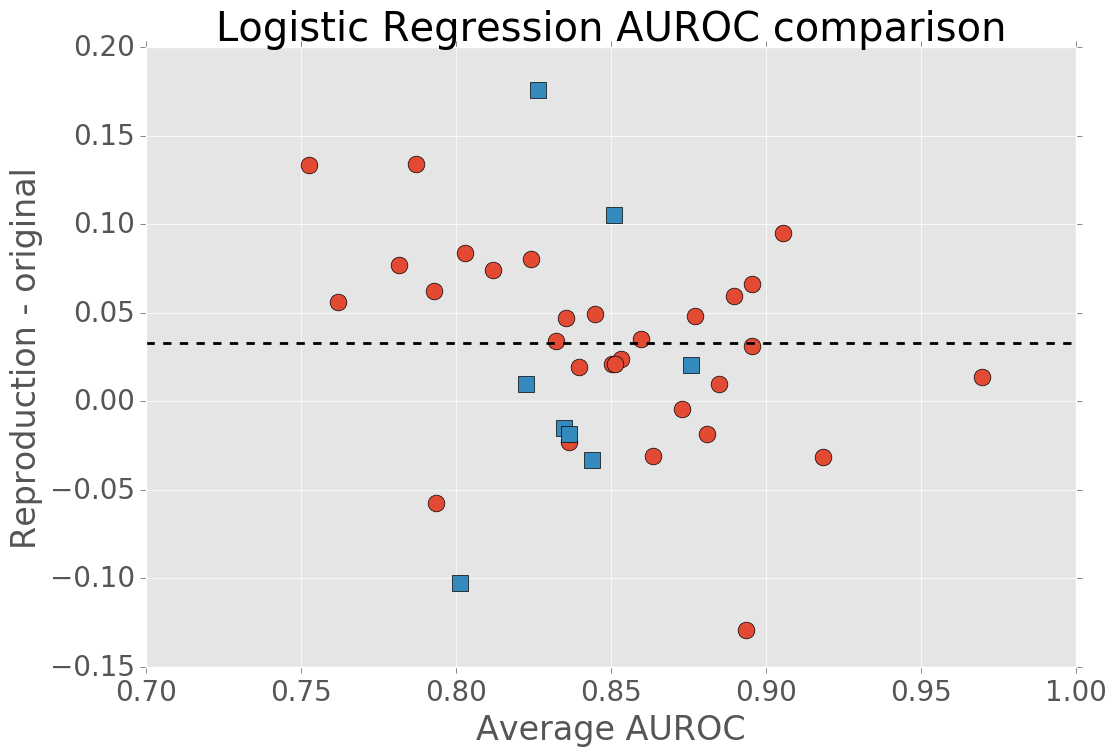

27/38 (71.05%) had repro > study.
If isolating to studies with non-fixed sample size...
23/30 (76.67%) had repro > study.


In [118]:
# bland-altman


# exclude studies which had a fixed sample size
# add physionet2012 studies to this
studies_ignore = ['caballero2015dynamically',
                  'che2016recurrent','ding2016mortality',
                  'johnson2012patient', 'johnson2014data']
idxIgnore = np.in1d(df['Cohort'], studies_ignore)


xi = np.arange(0.5, 2.6, 0.1)
plt.figure(figsize=[12,8])
plt.plot((df.loc[~idxIgnore,'LR']+df.loc[~idxIgnore,'Study'])/2.0,
         df.loc[~idxIgnore,'LR']-df.loc[~idxIgnore,'Study'],
         marker='o', markersize=12, linestyle='none',
         label='All studies')

# overlay the physionet 2012 datasets
plt.plot((df.loc[idxIgnore,'LR']+df.loc[idxIgnore,'Study'])/2.0,
         df.loc[idxIgnore,'LR']-df.loc[idxIgnore,'Study'],
         marker='s', markersize=12, linestyle='none',
         label='Fixed sample size')

# plot average bias
plt.plot([0.7, 1],
         np.ones(2)*np.mean(df.loc[~idxIgnore,'LR']-df.loc[~idxIgnore,'Study']),
         'k--', linewidth=2)

plt.title('Logistic Regression AUROC comparison')
plt.xlabel('Average AUROC')
plt.ylabel('Reproduction - original')

#plt.legend(loc='upper right')
plt.xlim([0.7,1.0])
plt.show()

print('{}/{} ({:2.2f}%) had repro > study.'.format(
        np.sum( df['LR'] > df['Study'] ), df.shape[0],
        100.0*np.mean( df['LR'] > df['Study'] )
    ))
print('If isolating to studies with non-fixed sample size...')
print('{}/{} ({:2.2f}%) had repro > study.'.format(
        np.sum( df.loc[~idxIgnore,'LR'] > df.loc[~idxIgnore,'Study'] ), np.sum(~idxIgnore),
        100.0*np.mean( df.loc[~idxIgnore,'LR'] > df.loc[~idxIgnore,'Study'] )
    ))

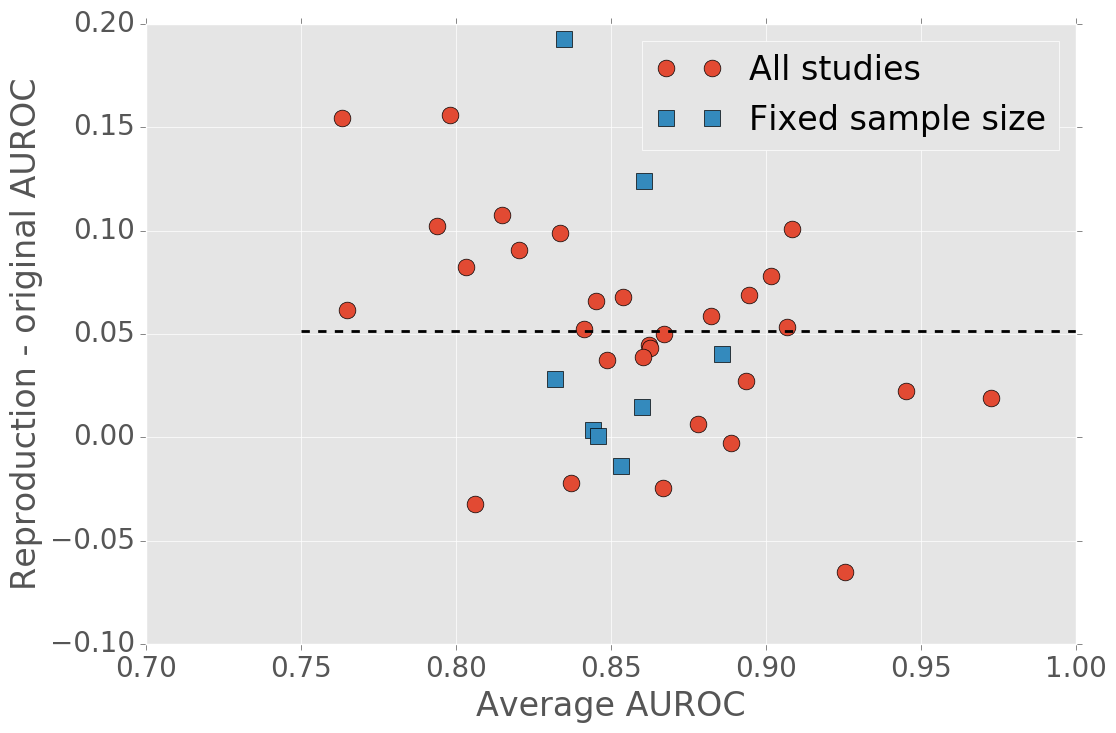

32/38 (84.21%) had repro > study.
If isolating to studies with non-fixed sample size...
25/30 (83.33%) had repro > study.


In [20]:
# bland-altman


# exclude studies which had a fixed sample size
# add physionet2012 studies to this
studies_ignore = ['caballero2015dynamically',
                  'che2016recurrent','ding2016mortality',
                  'johnson2012patient', 'johnson2014data']
idxIgnore = np.in1d(df['Cohort'], studies_ignore)


xi = np.arange(0.5, 2.6, 0.1)
plt.figure(figsize=[12,8])
plt.plot((df.loc[~idxIgnore,'GB']+df.loc[~idxIgnore,'Study'])/2.0,
         df.loc[~idxIgnore,'GB']-df.loc[~idxIgnore,'Study'],
         marker='o', markersize=12, linestyle='none',
         label='All studies')

# overlay the physionet 2012 datasets
plt.plot((df.loc[idxIgnore,'GB']+df.loc[idxIgnore,'Study'])/2.0,
         df.loc[idxIgnore,'GB']-df.loc[idxIgnore,'Study'],
         marker='s', markersize=12, linestyle='none',
         label='Fixed sample size')

# plot average bias
plt.plot([0.75, 1],
         np.ones(2)*np.mean(df.loc[~idxIgnore,'GB']-df.loc[~idxIgnore,'Study']),
         'k--', linewidth=2)
plt.xlabel('Average AUROC')
plt.ylabel('Reproduction - original AUROC')

plt.legend(loc='upper right')

plt.show()

print('{}/{} ({:2.2f}%) had repro > study.'.format(
        np.sum( df['GB'] > df['Study'] ), df.shape[0],
        100.0*np.mean( df['GB'] > df['Study'] )
    ))
print('If isolating to studies with non-fixed sample size...')
print('{}/{} ({:2.2f}%) had repro > study.'.format(
        np.sum( df.loc[~idxIgnore,'GB'] > df.loc[~idxIgnore,'Study'] ), np.sum(~idxIgnore),
        100.0*np.mean( df.loc[~idxIgnore,'GB'] > df.loc[~idxIgnore,'Study'] )
    ))

# Page size vs sample size

In [39]:
from sklearn import linear_model
from sklearn import metrics

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

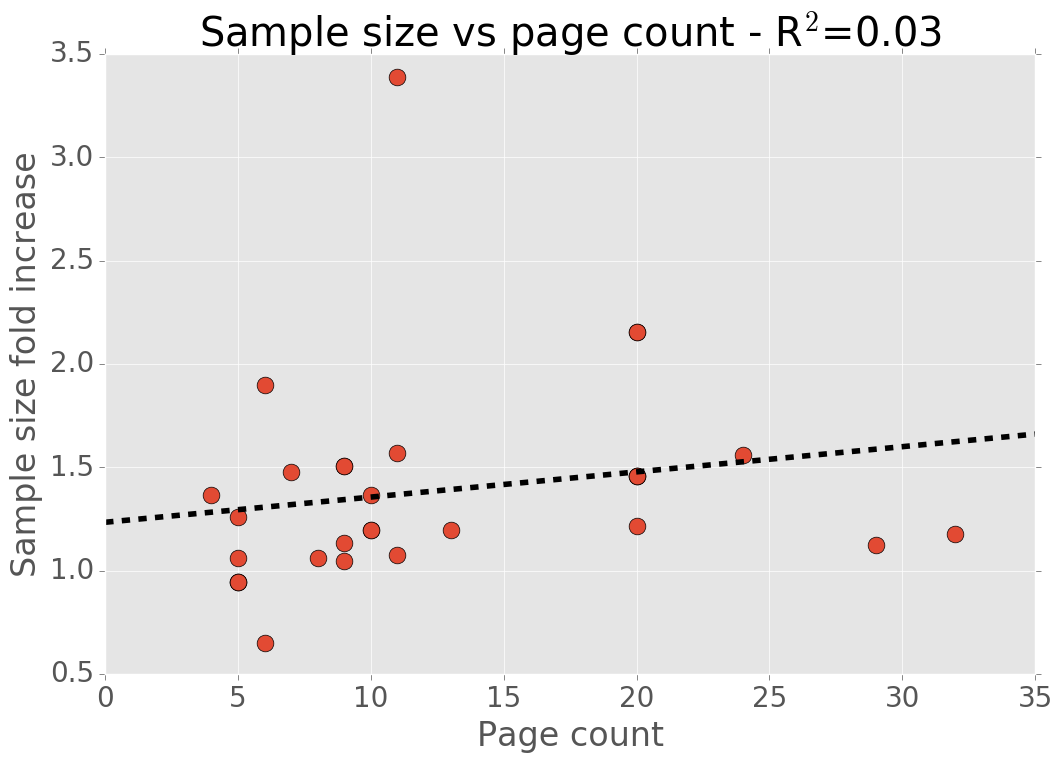

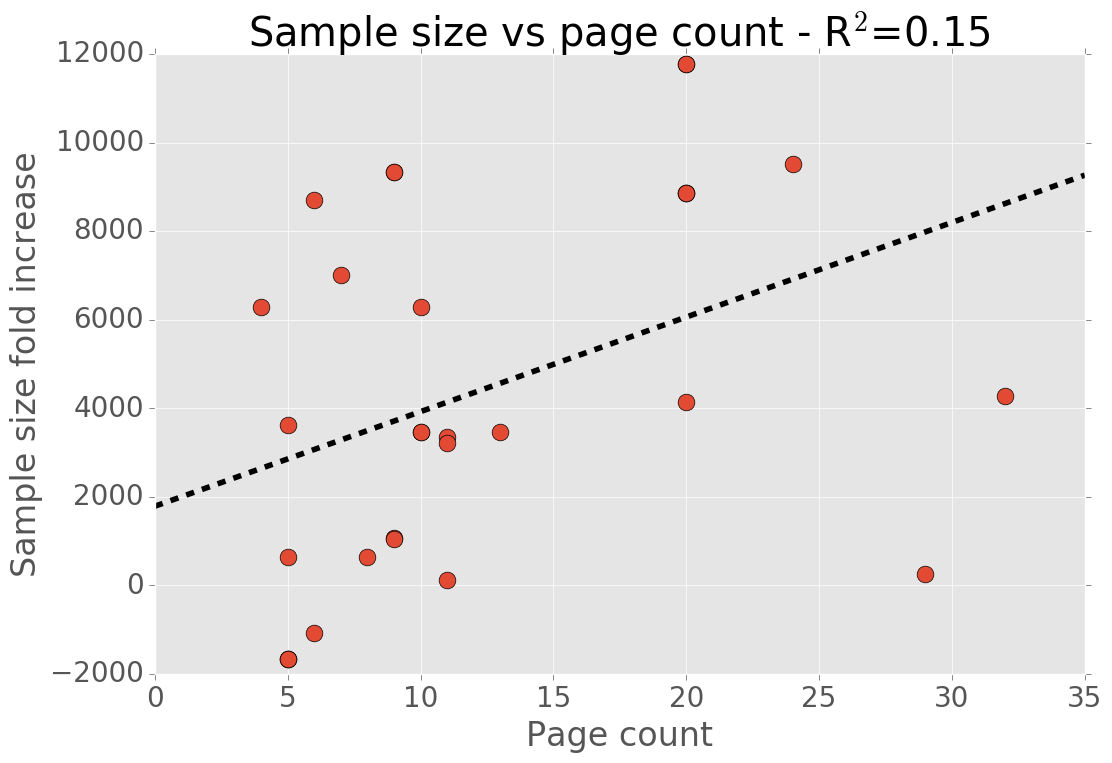

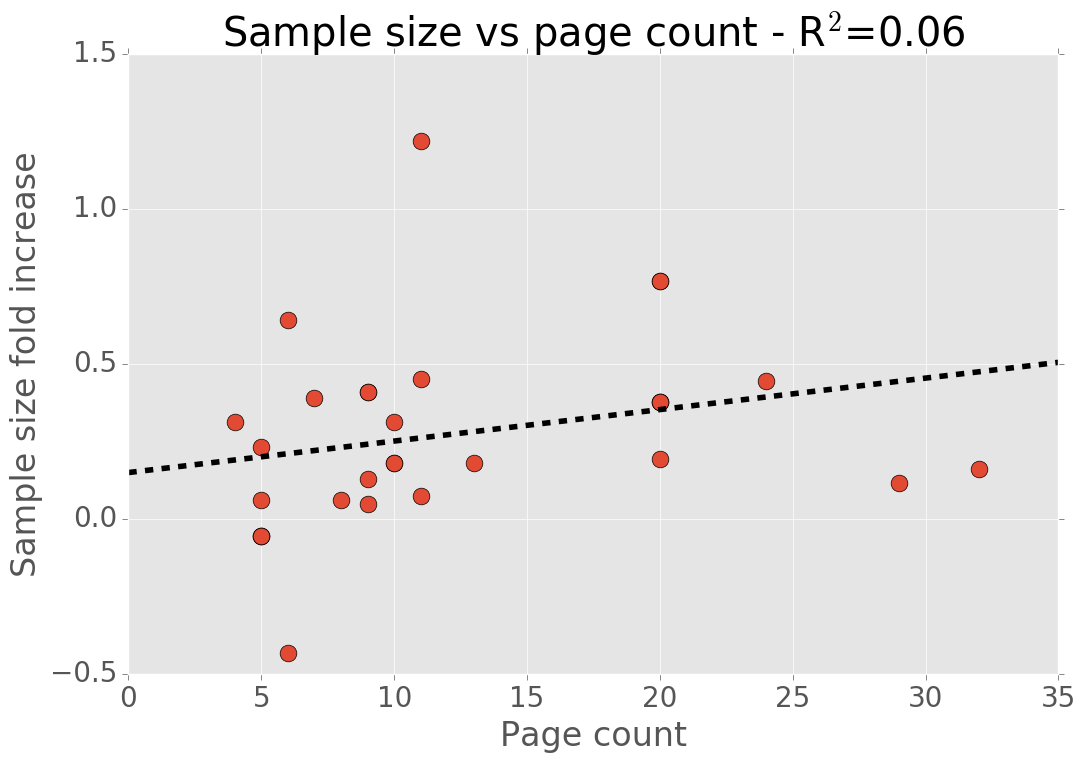

In [116]:
# ignore studies with fixed sample size
studies_ignore = ['caballero2015dynamically',
                  'che2016recurrent','ding2016mortality',
                  'johnson2012patient', 'johnson2014data']
idxIgnore = np.in1d(df['Cohort'], studies_ignore)

# repeat for different transforms of sample size
yi = [df.loc[~idxIgnore,'N_Repro']/df.loc[~idxIgnore,'N_Study'],
     df.loc[~idxIgnore,'N_Repro']-df.loc[~idxIgnore,'N_Study'],
     np.log(df.loc[~idxIgnore,'N_Repro']/df.loc[~idxIgnore,'N_Study'])]

X = df.loc[~idxIgnore,'pages'].values.reshape(-1,1)
N = X.shape[0]

xi = np.asarray([0,35]).reshape(-1,1)
for y in yi:

    # scatter plot
    plt.figure(figsize=[12,8])
    plt.plot(X, y,
             marker='o', markersize=12, linestyle='none',
             label='All studies')

    # plot line of best fit
    mdl = linear_model.LinearRegression()
    mdl.fit(X, y.values)
    
    plt.plot(xi, mdl.predict(xi), 'k--',linewidth=4)
    
    #plt.plot([0, 50], [0, 50], 'k--', linewidth=2)
    plt.title('Sample size vs page count - R$^2$={:0.2f}'.format(
    metrics.r2_score(y,mdl.predict(X))))
    plt.xlabel('Page count')
    plt.ylabel('Sample size fold increase')

    #plt.legend(loc='lower right')

    plt.show()

In [15]:
df.groupby(u'split')['Cohort'].count()

split
10-fold CV     7
4-fold CV      2
5-fold CV     14
50/50          3
70/15/15       1
70/30          3
80/10/10       3
80/20          5
Name: Cohort, dtype: int64